# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"appid="+weather_api_key+"&q="+city+"&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kaitangata
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | qandala
Processing Record 5 of Set 1 | casablanca
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | katsuura
Processing Record 8 of Set 1 | dikson
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | panguipulli
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | mahebourg
Processing Record 14 of Set 1 | conway
Processing Record 15 of Set 1 | kruisfontein
Processing Record 16 of Set 1 | bichura
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | longyearbyen
Processing Record 19 of Set 1 | san benito abad
Processing Record 20 of Set 1 | hirara
Processing Record 21 of Set 1 | toledo
Processing Record 22 of Set 1 | la palma
Processing Record 23 of Set 

Processing Record 39 of Set 4 | zhezkazgan
Processing Record 40 of Set 4 | drumheller
Processing Record 41 of Set 4 | xichang
Processing Record 42 of Set 4 | bethel
Processing Record 43 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 44 of Set 4 | boende
Processing Record 45 of Set 4 | the valley
Processing Record 46 of Set 4 | mar del plata
Processing Record 47 of Set 4 | coahuayana
Processing Record 48 of Set 4 | santa luzia
Processing Record 49 of Set 4 | beipiao
Processing Record 0 of Set 5 | gamba
Processing Record 1 of Set 5 | hami
Processing Record 2 of Set 5 | maridi
Processing Record 3 of Set 5 | robertsport
Processing Record 4 of Set 5 | kieta
Processing Record 5 of Set 5 | nikolskoye
Processing Record 6 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 7 of Set 5 | tucuman
Processing Record 8 of Set 5 | yellowknife
Processing Record 9 of Set 5 | zyryanovsk
Processing Record 10 of Set 5 | saint george
Processing Record 11 of Set 5 | inuvik

Processing Record 29 of Set 8 | ionia
Processing Record 30 of Set 8 | labuhan
Processing Record 31 of Set 8 | riaba
City not found. Skipping...
Processing Record 32 of Set 8 | pacifica
Processing Record 33 of Set 8 | broken hill
Processing Record 34 of Set 8 | birecik
Processing Record 35 of Set 8 | sivas
Processing Record 36 of Set 8 | saint-louis
Processing Record 37 of Set 8 | la serena
Processing Record 38 of Set 8 | liverpool
Processing Record 39 of Set 8 | namibe
Processing Record 40 of Set 8 | bayshore gardens
Processing Record 41 of Set 8 | ust-omchug
Processing Record 42 of Set 8 | mandalgovi
Processing Record 43 of Set 8 | isla vista
Processing Record 44 of Set 8 | gigmoto
Processing Record 45 of Set 8 | chokurdakh
Processing Record 46 of Set 8 | salalah
Processing Record 47 of Set 8 | saint-georges
Processing Record 48 of Set 8 | cayenne
Processing Record 49 of Set 8 | merauke
Processing Record 0 of Set 9 | quebrangulo
Processing Record 1 of Set 9 | san cristobal
Processing 

Processing Record 21 of Set 12 | kargopol
Processing Record 22 of Set 12 | nowy targ
Processing Record 23 of Set 12 | wageningen
Processing Record 24 of Set 12 | hovd
Processing Record 25 of Set 12 | goderich
Processing Record 26 of Set 12 | roma
Processing Record 27 of Set 12 | smithers
Processing Record 28 of Set 12 | boyolangu
Processing Record 29 of Set 12 | meulaboh
Processing Record 30 of Set 12 | portland
Processing Record 31 of Set 12 | mahon
Processing Record 32 of Set 12 | ruhengeri
Processing Record 33 of Set 12 | quatre cocos
Processing Record 34 of Set 12 | port macquarie
Processing Record 35 of Set 12 | axim
Processing Record 36 of Set 12 | pabna
Processing Record 37 of Set 12 | alexandria
Processing Record 38 of Set 12 | orbetello
Processing Record 39 of Set 12 | berlevag
Processing Record 40 of Set 12 | navoi
Processing Record 41 of Set 12 | kakching
Processing Record 42 of Set 12 | ponta do sol
Processing Record 43 of Set 12 | devin
Processing Record 44 of Set 12 | cor

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kaitangata,-46.2817,169.8464,20.17,76,99,3.55,NZ,1675220054
1,port alfred,-33.5906,26.8910,18.99,96,5,2.17,ZA,1675220012
2,vaini,-21.2000,-175.2000,28.09,89,75,4.63,TO,1675219985
3,qandala,11.4720,49.8728,22.22,74,37,2.28,SO,1675220054
4,casablanca,33.5928,-7.6192,7.01,66,9,1.69,MA,1675219757


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kaitangata,-46.2817,169.8464,20.17,76,99,3.55,NZ,1675220054
1,port alfred,-33.5906,26.8910,18.99,96,5,2.17,ZA,1675220012
2,vaini,-21.2000,-175.2000,28.09,89,75,4.63,TO,1675219985
3,qandala,11.4720,49.8728,22.22,74,37,2.28,SO,1675220054
4,casablanca,33.5928,-7.6192,7.01,66,9,1.69,MA,1675219757


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

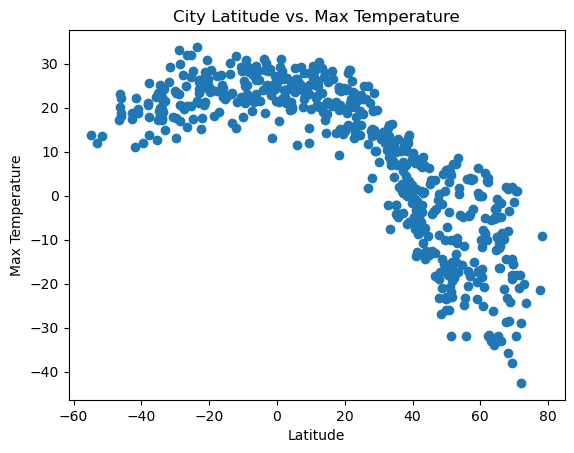

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
           city_data_df["Max Temp"], 
           marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

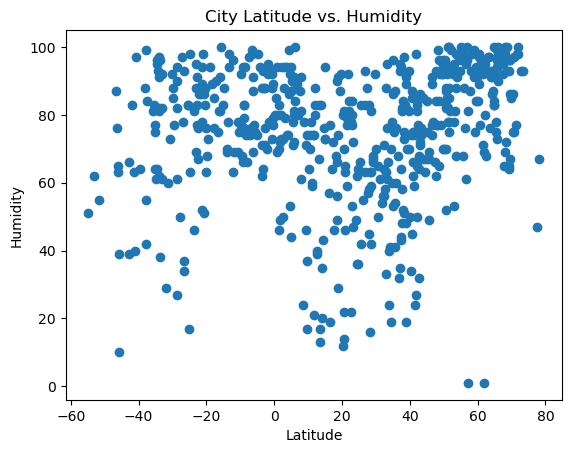

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], 
           city_data_df["Humidity"], 
           marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

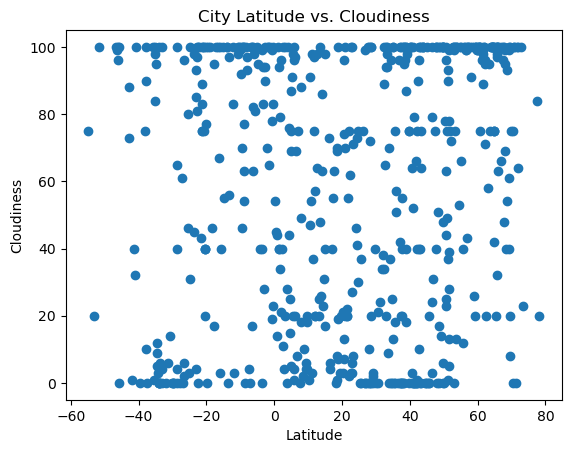

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], 
           city_data_df["Cloudiness"], 
           marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

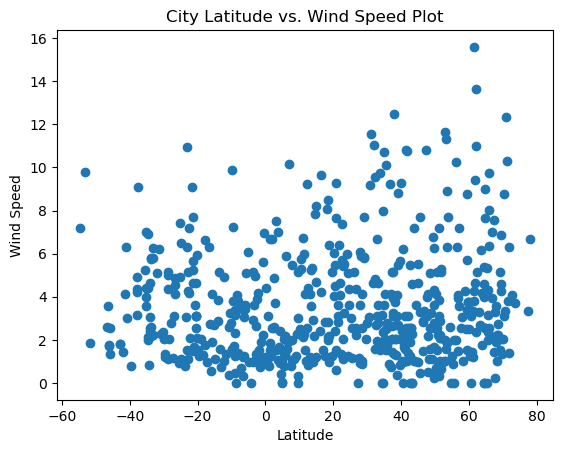

In [66]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], 
           city_data_df["Wind Speed"], 
           marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# Listed Above

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df.Lat>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,qandala,11.4720,49.8728,22.22,74,37,2.28,SO,1675220054
4,casablanca,33.5928,-7.6192,7.01,66,9,1.69,MA,1675219757
6,katsuura,35.1333,140.3000,10.01,53,13,10.70,JP,1675219506
7,dikson,73.5069,80.5464,-24.36,93,23,3.69,RU,1675219979
13,conway,35.0887,-92.4421,-2.01,96,100,3.60,US,1675220056


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df.Lat< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kaitangata,-46.2817,169.8464,20.17,76,99,3.55,NZ,1675220054
1,port alfred,-33.5906,26.8910,18.99,96,5,2.17,ZA,1675220012
2,vaini,-21.2000,-175.2000,28.09,89,75,4.63,TO,1675219985
5,port elizabeth,-33.9180,25.5701,19.62,97,0,2.57,ZA,1675219986
8,rikitea,-23.1203,-134.9692,26.23,69,4,6.32,PF,1675220055


###  Temperature vs. Latitude Linear Regression Plot

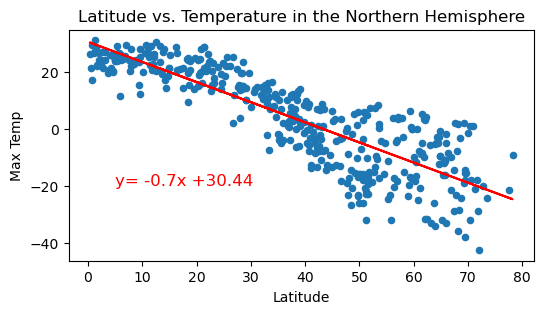

The r-value is: 0.7240899003324639


In [84]:
# Linear regression on Northern Hemisphere

x_lat = northern_hemi_df["Lat"]
y_temp = northern_hemi_df["Max Temp"]

(slope,intercept,rvalue,pvalue,stderr) = linregress(x_lat,y_temp)
regress = x_lat*slope+intercept
line = "y= "+str(round(slope,2)) + "x +"+str(round(intercept,2))

northern_hemi_df.plot(kind="scatter",x='Lat',y='Max Temp', figsize=(6,3))
plt.plot(x_lat,regress,"r-")
plt.annotate(line, (5, -20), fontsize=12, color='red')
plt.title("Latitude vs. Temperature in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()
print(f'The r-value is: {rvalue**2}')


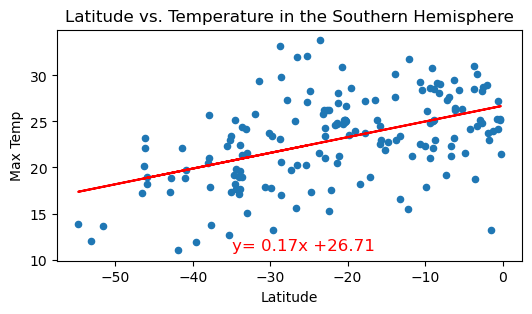

The r-value is: 0.23346615412378693


In [83]:
# Linear regression on Southern Hemisphere
x_lat = southern_hemi_df["Lat"]
y_temp = southern_hemi_df["Max Temp"]

(slope,intercept,rvalue,pvalue,stderr) = linregress(x_lat,y_temp)
regress = x_lat*slope+intercept
line = "y= "+str(round(slope,2)) + "x +"+str(round(intercept,2))

southern_hemi_df.plot(kind="scatter",x='Lat',y='Max Temp', figsize=(6,3))
plt.plot(x_lat,regress,"r-")
plt.annotate(line, (-35,11), fontsize=12, color='red')
plt.title("Latitude vs. Temperature in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()
print(f'The r-value is: {rvalue**2}')

**Discussion about the linear relationship:** Based on the two graphs, the closer the latitude is to 0 the hotter the city. Also, the less the latitude, the colder the city. 

### Humidity vs. Latitude Linear Regression Plot

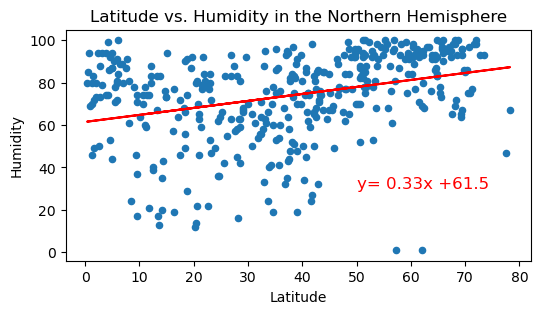

The r-value is: 0.10799900850959195


In [80]:
# Northern Hemisphere
x_lat = northern_hemi_df["Lat"]
y_humi = northern_hemi_df["Humidity"]

(slope,intercept,rvalue,pvalue,stderr) = linregress(x_lat,y_humi)
regress = x_lat*slope+intercept
line = "y= "+str(round(slope,2)) + "x +"+str(round(intercept,2))

northern_hemi_df.plot(kind="scatter",x='Lat',y='Humidity', figsize=(6,3))
plt.plot(x_lat,regress,"r-")
plt.annotate(line, (50, 30), fontsize=12, color='red')
plt.title("Latitude vs. Humidity in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()
print(f'The r-value is: {rvalue**2}')

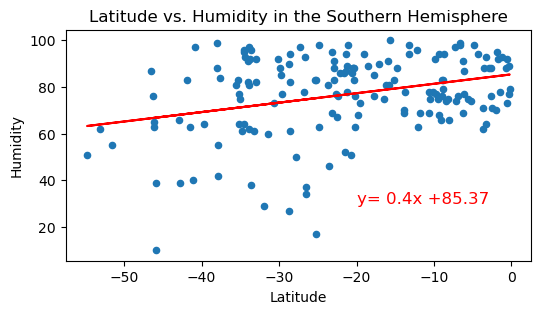

The r-value is: 0.0996353796397617


In [79]:
# Southern Hemisphere
x_lat = southern_hemi_df["Lat"]
y_humi = southern_hemi_df["Humidity"]

(slope,intercept,rvalue,pvalue,stderr) = linregress(x_lat,y_humi)
regress = x_lat*slope+intercept
line = "y= "+str(round(slope,2)) + "x +"+str(round(intercept,2))

southern_hemi_df.plot(kind="scatter",x='Lat',y='Humidity', figsize=(6,3))
plt.plot(x_lat,regress,"r-")
plt.annotate(line, (-20, 30), fontsize=12, color='red')
plt.title("Latitude vs. Humidity in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()
print(f'The r-value is: {rvalue**2}')

**Discussion about the linear relationship:** Based on the two graps, in the southern hemisphere the humdity tends to be high regardless of the latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

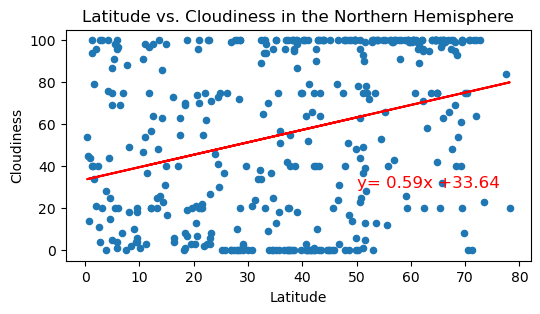

The r-value is: 0.09640225457588325


In [78]:
# Northern Hemisphere
x_lat = northern_hemi_df["Lat"]
y_cloud = northern_hemi_df["Cloudiness"]

(slope,intercept,rvalue,pvalue,stderr) = linregress(x_lat,y_cloud)
regress = x_lat*slope+intercept
line = "y= "+str(round(slope,2)) + "x +"+str(round(intercept,2))

northern_hemi_df.plot(kind="scatter",x='Lat',y='Cloudiness', figsize=(6,3))
plt.plot(x_lat,regress,"r-")
plt.annotate(line, (50, 30), fontsize=12, color='red')
plt.title("Latitude vs. Cloudiness in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()
print(f'The r-value is: {rvalue**2}')

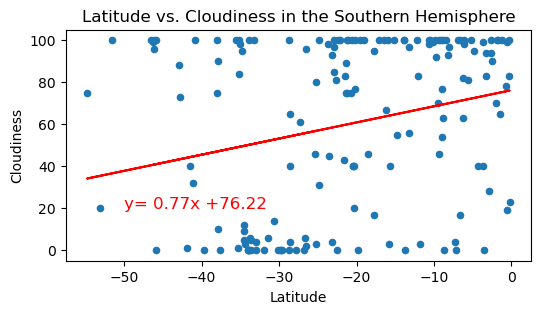

The r-value is: 0.06495689960612708


In [77]:
# Southern Hemisphere
x_lat = southern_hemi_df["Lat"]
y_cloud = southern_hemi_df["Cloudiness"]

(slope,intercept,rvalue,pvalue,stderr) = linregress(x_lat,y_cloud)
regress = x_lat*slope+intercept
line = "y= "+str(round(slope,2)) + "x +"+str(round(intercept,2))

southern_hemi_df.plot(kind="scatter",x='Lat',y='Cloudiness', figsize=(6,3))
plt.plot(x_lat,regress,"r-")
plt.annotate(line, (-50, 20), fontsize=12, color='red')
plt.title("Latitude vs. Cloudiness in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()
print(f'The r-value is: {rvalue**2}')

**Discussion about the linear relationship:** Based on the two graphs, the rate of cloudiness is not directly based on the latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

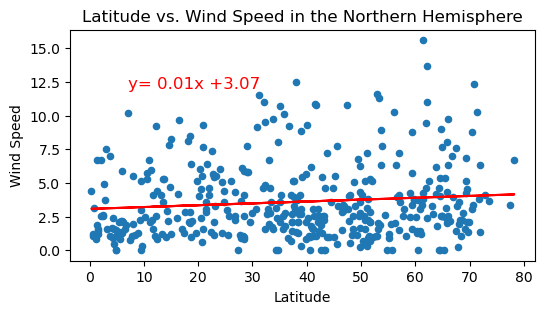

The r-value is: 0.01031423267935136


In [75]:
# Northern Hemisphere
x_lat = northern_hemi_df["Lat"]
y_wind = northern_hemi_df["Wind Speed"]

(slope,intercept,rvalue,pvalue,stderr) = linregress(x_lat,y_wind)
regress = x_lat*slope+intercept
line = "y= "+str(round(slope,2)) + "x +"+str(round(intercept,2))

northern_hemi_df.plot(kind="scatter",x='Lat',y='Wind Speed', figsize=(6,3))
plt.plot(x_lat,regress,"r-")
plt.annotate(line, (7, 12), fontsize=12, color='red')
plt.title("Latitude vs. Wind Speed in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()
print(f'The r-value is: {rvalue**2}')

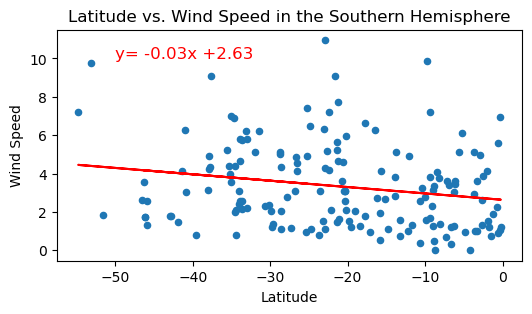

The r-value is: 0.041602322309032894


In [76]:
# Southern Hemisphere
x_lat = southern_hemi_df["Lat"]
y_wind = southern_hemi_df["Wind Speed"]

(slope,intercept,rvalue,pvalue,stderr) = linregress(x_lat,y_wind)
regress = x_lat*slope+intercept
line = "y= "+str(round(slope,2)) + "x +"+str(round(intercept,2))

southern_hemi_df.plot(kind="scatter",x='Lat',y='Wind Speed', figsize=(6,3))
plt.plot(x_lat,regress,"r-")
plt.annotate(line, (-50, 10), fontsize=12, color='red')
plt.title("Latitude vs. Wind Speed in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()
print(f'The r-value is: {rvalue**2}')

**Discussion about the linear relationship:** Based on the two graphs, the wind speed is not dependent on the latitude. Majority of the cities have a low wind speed. 